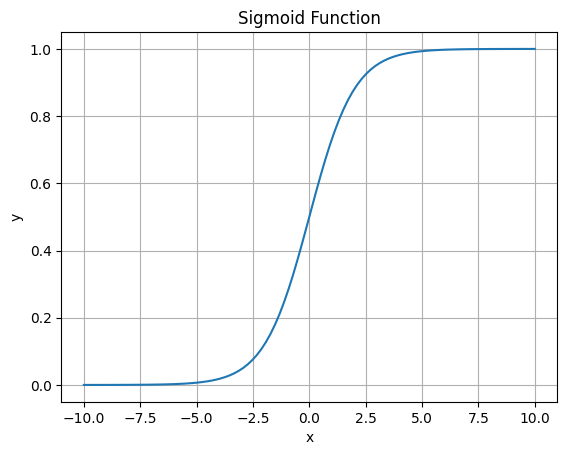

In [2]:
# 실습 1_1 - Logistic Regression에 사용되는 Sigmoid 함수 plot

import numpy as np
import matplotlib.pyplot as plt

# sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)  # -10부터 10까지 100등분한 값
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

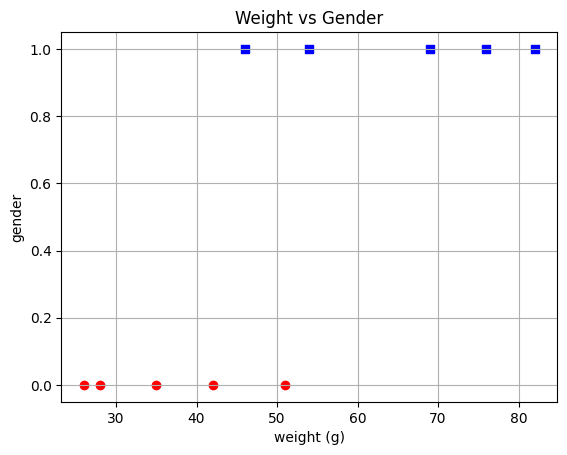

In [3]:
# 실습 1_2 - 제공된 데이터 파일을 불러들여 X축은 사슴벌레의 무게(g), y축은 성별을 나타내는 2차원 평면에 각 데이터의 위치를 표시

import pandas as pd

# CSV 파일을 읽어 Pandas DataFrame으로 변환
data = pd.read_csv("C:/Coding/Python/machine_learning/week8, 9/binary_data_insect.csv", names=['weights', 'genders'])

# 데이터에서 사슴벌레의 무게(g)와 성별 추출
X = data['weights'].to_numpy()
y = data['genders'].to_numpy()

# 성별에 따라 색상과 마커 지정
colors = {0: 'red', 1: 'blue'}
markers = {0: 'o', 1: 's'}

# 성별에 따라 데이터 플롯
for weight, gender in zip(X, y):    # 사슴벌레 무게와 성별 데이터를 하나의 차트에 표시
    plt.scatter(weight, gender, color=colors[gender], marker=markers[gender])

plt.xlabel("weight (g)")
plt.ylabel("gender")
plt.title("Weight vs Gender")
plt.grid()

plt.show()

C:\Users\jmw31\AppData\Local\Temp\ipykernel_15976\2633519497.py:10: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\jmw31\AppData\Local\Temp\ipykernel_15976\2633519497.py:10: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Epoch 10000, Loss: 0.6130020637150991
Epoch 20000, Loss: 0.5078454474205243
Epoch 30000, Loss: 0.4443232828426262
Epoch 40000, Loss: 0.4035241190417371
Epoch 50000, Loss: 0.37572677238762925
Epoch 60000, Loss: 0.3558206825207572
Epoch 70000, Loss: 0.3409758878568924
Epoch 80000, Loss: 0.3295359383631182
Epoch 90000, Loss: 0.32048062416101186
Epoch 100000, Loss: 0.31315295216255656
Epoch 110000, Loss: 0.30711324554083014
Epoch 120000, Loss: 0.3020573566744969
Epoch 130000, Loss: 0.297768788161349
Epoch 140000, Loss: 0.29408955977065093
Epoch 150000, Loss: 0.2909018642433625
Epoch 160000, Loss: 0.2881161605738546
Epoch 170000, Loss: 0.2856632344507365
Epoch 180000, Loss: 0.2834887751955441
Epoch 190000, Loss: 0.28154959094301873
Epoch 200000, Loss: 0.27981091551209325
Epoch 210000, Loss: 0.27824445826573346
Epoch 220000, Loss: 0.2768269694030716
Epoch 230000, Loss: 0.27553916909982096
Epoch 240000, Loss: 0.27436493760784625
Epoch 250000, Loss: 0.27329069526588146


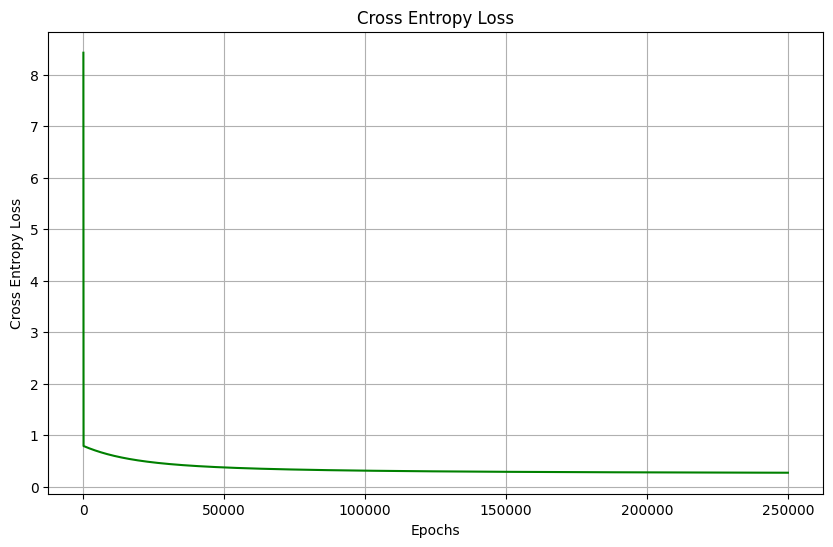

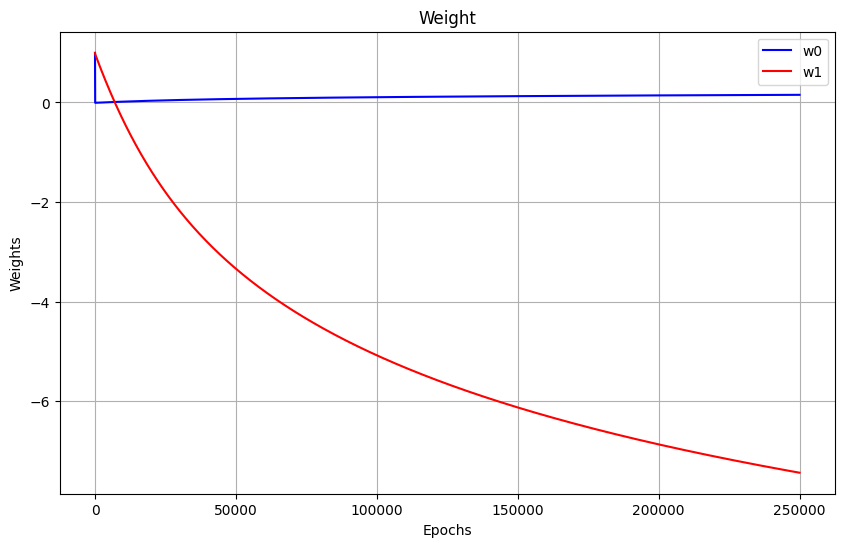

최종 가중치 (w0, w1): [ 0.15358269 -7.43930623]


In [4]:
# 실습 1_3 - 사슴벌레 분류 문제를 Logistic Regression으로 판별 후 Cross Entropy Loss & Gradient Descent 알고리즘을 적용하여 가중치 w_0, w_1을 구하고 그 변화과정을 plot

# sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # 로그의 값이 무한대로 발산하는 것을 방지하기 위한 아주 작은 값
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # 0 또는 1에 수렴하지 않도록 값 제한
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# np.clip() -> array 내의 element들에 대해서 min 값 보다 작은 값들을 min값으로 바꿔주고 max 값 보다 큰 값들을 max값으로 바꿔주는 함수

# Gradient Descent
def gradient_descent(X, y, learning_rate, epochs):
    n = X.shape[0]  # data sample
    m = X.shape[1]  # bias & weights
    w = np.ones(m)
    loss_history = []
    weights_history = []

    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy_loss(y, y_pred)
        gradient = np.dot(X.T, (y_pred - y)) / n
        w -= learning_rate * gradient
        loss_history.append(loss)
        weights_history.append(w.copy())

        if (epoch + 1) % 10000 == 0:
            print(f'Epoch {epoch + 1}, Loss: {loss}')
    
    return w, loss_history, weights_history

# bias을 위한 Intercept 항 추가
X = np.vstack([ X , np.ones(len(X))]).T # 주어진 배열들을 수직으로 쌓아서(위아래로) 하나의 배열로 결합

# 학습률과 에포크 설정
learning_rate = 0.001
epochs = 250_000

# Gradient Descent 알고리즘 적용
weights, loss_history, weights_history = gradient_descent(X, y, learning_rate, epochs)

# 에포크와 Cross Entropy Loss에 대한 그래프
plt.figure(figsize=(10, 6))
plt.plot(loss_history, 'g')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.grid()
plt.show()

# 에포크와 가중치 대한 그래프
weights_history = np.array(weights_history)
plt.figure(figsize=(10, 6))
plt.plot(weights_history[:, 0], 'b', label='w0')
plt.plot(weights_history[:, 1], 'r', label='w1')
plt.title('Weight')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.legend()
plt.grid()
plt.show()

print('최종 가중치 (w0, w1):', weights)

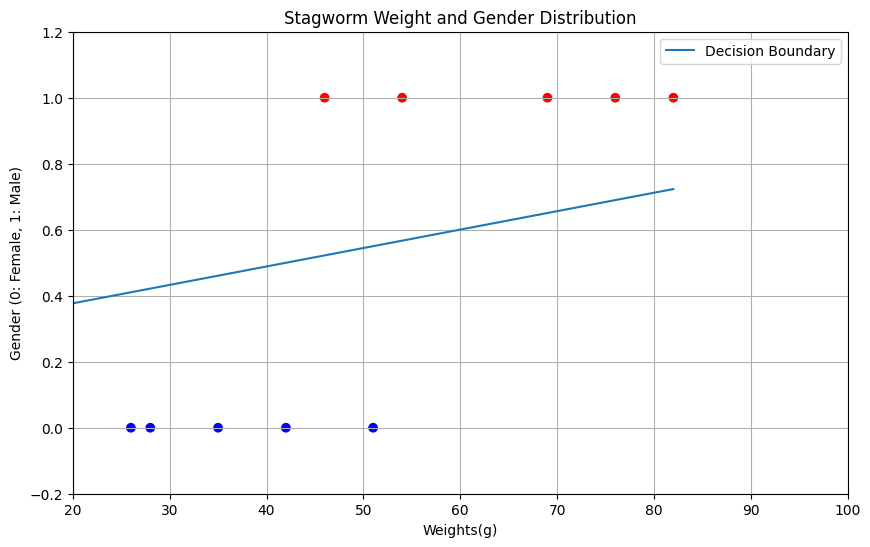

훈련결과, 정확도 : 50.00%
Predicted gender for weight 20g: 1
w0 = 0.005586329449659029, w1 = 0.2651949907654035


In [9]:
# 실습 1_4 - Logistic Regression의 정확도를 산출하고 Decision Boundary를 plot 
# ※ predict 함수를 만들어 임의의 값을 이용해 성별을 판별

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Descent
def gradient_descent(X, y, learning_rate, epochs):
    n = X.shape[0]  # data sample
    m = X.shape[1]  # bias & weights
    w = np.ones(m)
    loss_history = []
    acc_history = []

    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy_loss(y, y_pred)
        gradient = np.dot(X.T, (y_pred - y)) / n
        w -= learning_rate * gradient
        loss_history.append(loss)

        # 정확도 계산
        acc = accuracy(X, y, w)
        acc_history.append(acc)

        if (epoch + 1) % 10000 == 0:
            print(f'Epoch {epoch + 1}, Loss: {loss}, Accuracy: {acc}%')
    
    return w, loss_history, acc_history

# accuracy
def accuracy(X, y, weights):
    y_pred = predict(X, weights)
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)  # 확률을 0 또는 1로 변환
    acc = np.mean(y_pred_class == y) * 100
    return acc

# predict
def predict(weight, weights):
    z = weight @ weights
    prob_male = sigmoid(z)
    return np.where(prob_male >= 0.5, 1, 0)  # 0.5 이상이면 1(Male), 아니면 0(Female)으로 예측

# CSV 파일을 읽어 Pandas DataFrame으로 변환
data = pd.read_csv("C:/Coding/Python/machine_learning/week8, 9/binary_data_insect.csv", names=['weight', 'gender'])

# 데이터에서 사슴벌레의 무게(g)와 성별 추출
X = data['weight'].to_numpy()
y = data['gender'].to_numpy()

# 절편(bias)을 위한 Intercept 항 추가
X = np.vstack([ X , np.ones(len(X))]).T

# 성별에 따라 색상 설정
colors = ['blue' if g == 0 else 'red' for g in y]

# 데이터 포인트 및 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['weight'], data['gender'], c=colors)
plt.xlabel('Weights(g)')
plt.ylabel('Gender (0: Female, 1: Male)')
plt.title('Stagworm Weight and Gender Distribution')
plt.grid()

# Decision boundary 직선 그리기

# 하이퍼파라미터 설정
learning_rate = 0.001
epochs = 5_000

# Gradient Descent를 통한 모델 학습
weights, loss_history, acc_history = gradient_descent(X, y, learning_rate, epochs)

x_values = np.linspace(np.min(X), np.max(X), len(X))
y_values = weights[0] * x_values + weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlim(20, 100)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

# 임의의 값을 사용하여 성별 예측
random_weight = np.array([1, 20])
predicted_gender = predict(random_weight, weights)

Accuracy = accuracy(X, y, weights)
prediction = predict(weights, random_weight)

print(f'훈련결과, 정확도 : {Accuracy:.2f}%')
print(f'Predicted gender for weight 20g: {prediction}')
print(f'w0 = {weights[0]}, w1 = {weights[1]}')

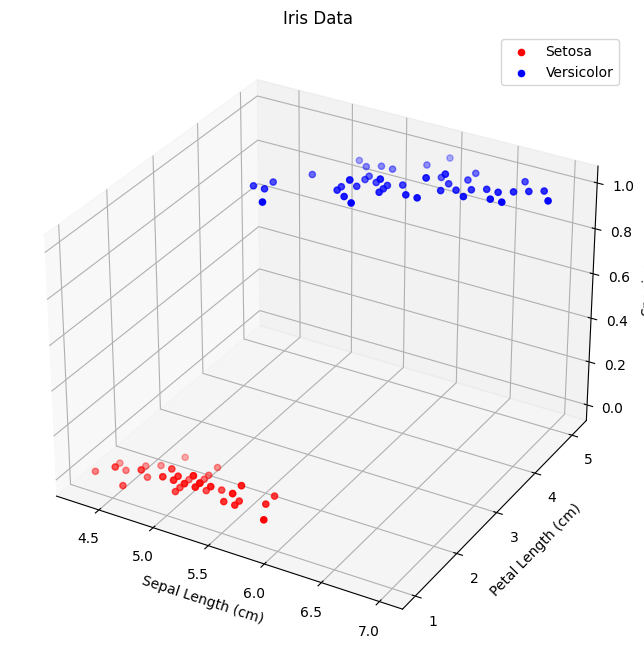

In [ ]:
# 실습 2_1 - 제공된 데이터 파일을 불러들여 3차원 공간에 표시

from mpl_toolkits.mplot3d import Axes3D

# CSV 파일을 읽어 Pandas DataFrame으로 변환
data = pd.read_csv("C:/Coding/Python/machine_learning/week8, 9/Iris.csv", names=['sepal_length', 'petal_length', 'variety'])

setosa = data[data['variety'] == 'Setosa']
versicolor = data[data['variety'] == 'Versicolor']

# 3차원 공간에 데이터 표시
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Setosa 종류의 데이터 0으로 구분
ax.scatter(setosa['sepal_length'], setosa['petal_length'], [0] * len(setosa), c='r', label='Setosa')

# Versicolor 종류의 데이터 1으로 구분
ax.scatter(versicolor['sepal_length'], versicolor['petal_length'], [1] * len(versicolor), c='b', label='Versicolor')

# 축 레이블과 범례 추가
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Species')
ax.legend()

plt.title('Iris Data')
plt.show()

Epoch 1000, Loss: 0.014707043801566875
Epoch 2000, Loss: 0.008049819074993107
Epoch 3000, Loss: 0.0056917382039247955
Epoch 4000, Loss: 0.004460333831527419
Epoch 5000, Loss: 0.003695622061055708
Epoch 6000, Loss: 0.00317098826317282
Epoch 7000, Loss: 0.0027869026500762567
Epoch 8000, Loss: 0.0024925380063097005
Epoch 9000, Loss: 0.0022591249666424782
Epoch 10000, Loss: 0.002069109901011718
Epoch 11000, Loss: 0.0019111505116078354
Epoch 12000, Loss: 0.001777578505886197
Epoch 13000, Loss: 0.001663015726678818
Epoch 14000, Loss: 0.0015635739230477868
Epoch 15000, Loss: 0.0014763692632148125
Epoch 16000, Loss: 0.0013992157344246442
Epoch 17000, Loss: 0.0013304248013417167
Epoch 18000, Loss: 0.0012686706010948195
Epoch 19000, Loss: 0.0012128968930042532
Epoch 20000, Loss: 0.001162251375306304


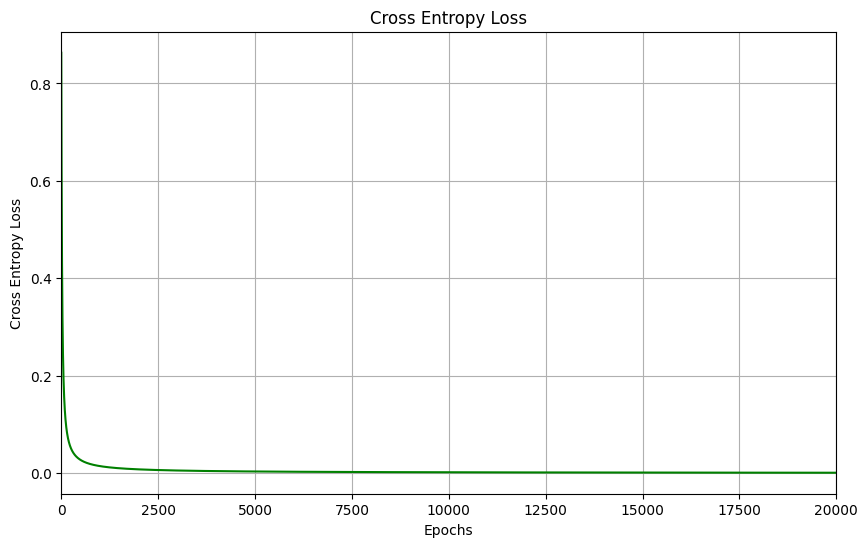

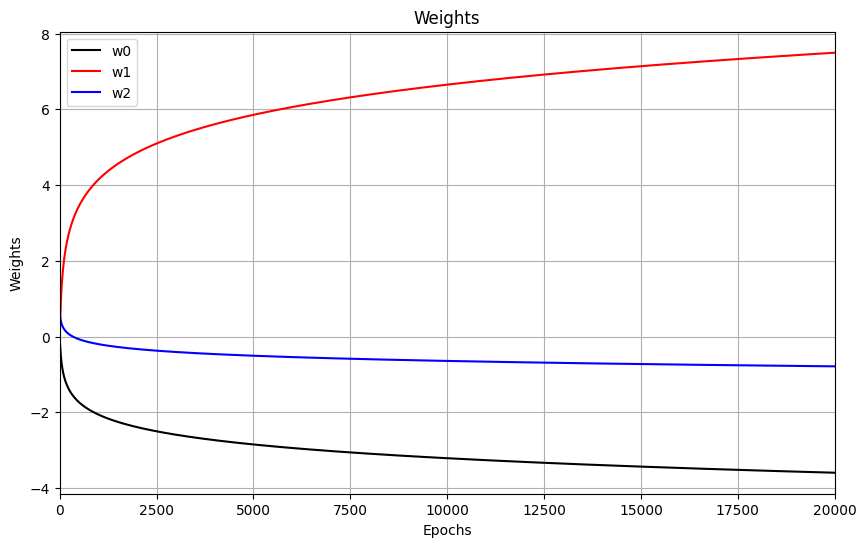

최종 가중치 (w0, w1, w2): -3.5926144845382497 7.493328342396564 -0.7845362531323385


In [ ]:
# 실습 2_2 - Cross Entropy Loss를 비용함수로 사용하는 경사하강법 구현 및 경사하강법의 반복 횟수에 따른 Cross Entropy Loss의 변화 및 매개변수의 변화를 그래프로 그리기

# Gradient Descent
def gradient_descent(X, y, learning_rate, epochs):
    n = X.shape[0]  # data sample
    m = X.shape[1]  # bias & weights
    w = np.zeros(m)
    loss_history = []
    weights_history = []

    for i in range(m) : # 주어진 범위에 맞게  임의의 값 설정
        w[i] = np.random.uniform(low = -3.0, high=3.0) 

    for epoch in range(epochs):
        z = np.dot(X, w) 
        y_pred = sigmoid(z)
        loss = cross_entropy_loss(y, y_pred)
        gradient = np.dot(X.T, (y_pred - y)) 
        w -= learning_rate * gradient
        
        loss_history.append(loss)
        weights_history.append(w.copy())

        if (epoch + 1) % 1000 == 0:
            print(f'Epoch {epoch + 1}, Loss: {loss}')
    
    return w, loss_history, weights_history

# CSV 파일을 읽어 Pandas DataFrame으로 변환
data = pd.read_csv("C:/Coding/Python/machine_learning/week8, 9/Iris.csv", names=['sepal_length', 'petal_length', 'variety'])

data = data[data['variety'].isin(['Setosa', 'Versicolor'])]
# 데이터에서 꽃받침 길이(cm), 꽃잎 길이(cm), iris (0, 1) 추출

# Setosa를 0, Versicolor를 1로 변환
data['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1})

# 입력값(X)과 목표값(y) 분리
X1 = data[['sepal_length']].values.reshape(-1, 1)
X2 = data[['petal_length']].values.reshape(-1, 1)
ones_column = np.ones((len(X1), 1))
X = np.hstack((X1, X2, ones_column))

y = data['variety'].values

# 학습률과 에포크 설정
learning_rate = 0.001
epochs = 20_000

# Gradient Descent 알고리즘 적용
weights, loss_history, weights_history = gradient_descent(X, y, learning_rate, epochs)

epochs_ = range(0, epochs)

# 에포크 수에 따른 Cross Entropy Loss의 변화
plt.figure(figsize=(10, 6))
plt.plot(epochs_, loss_history, 'green')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.xlim(0, epochs)
plt.grid()
plt.show()

# 에포크 수에 따른 가중치의 변화
weights_history = np.array(weights_history)
plt.figure(figsize=(10, 6))
plt.plot(epochs_, weights_history[:, 0],'black',  label='w0')
plt.plot(epochs_, weights_history[:, 1],'red', label='w1')
plt.plot(epochs_, weights_history[:, 2],'blue',  label='w2')
plt.title('Weights')
plt.xlabel('Epochs')
plt.ylabel('Weights')   
plt.xlim(0, epochs)
plt.legend()
plt.grid()
plt.show()

print('최종 가중치 (w0, w1, w2):', weights[0], weights[1], weights[2])

Epoch 1000, Loss: 0.01437958985481904
Epoch 2000, Loss: 0.007996020550577604
Epoch 3000, Loss: 0.005683579659889266
Epoch 4000, Loss: 0.004465265626877385
Epoch 5000, Loss: 0.0037050199158371066
Epoch 6000, Loss: 0.003181863412625393
Epoch 7000, Loss: 0.002798064669783501
Epoch 8000, Loss: 0.0025034809205339487
Epoch 9000, Loss: 0.0022696339407610234
Epoch 10000, Loss: 0.0020791029714679428
Epoch 11000, Loss: 0.001920608774521575
Epoch 12000, Loss: 0.0017865132393146779
Epoch 13000, Loss: 0.0016714521829855082
Epoch 14000, Loss: 0.0015715431063204578
Epoch 15000, Loss: 0.0014839037089901083
Epoch 16000, Loss: 0.001406347364219212
Epoch 17000, Loss: 0.001337183877978156
Epoch 18000, Loss: 0.0012750852754019764
Epoch 19000, Loss: 0.0012189930682274142
Epoch 20000, Loss: 0.0011680527392918768


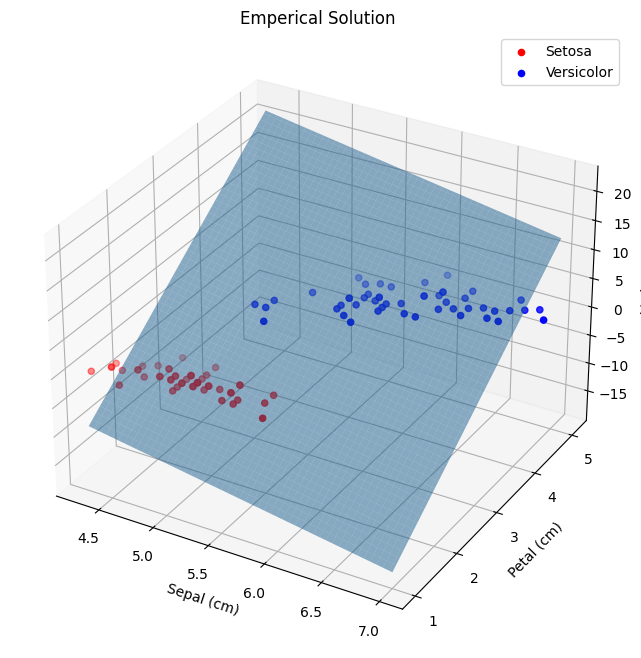

훈련결과, 정확도 : 100.00%
Predicted gender for weight 20g: 1
최종 가중치 (w0, w1, w2): -3.216041649326143 7.385922546304038 -2.4296577988680803


In [ ]:


# CSV 파일을 읽어 Pandas DataFrame으로 변환
data = pd.read_csv("C:/Coding/Python/machine_learning/week8, 9/Iris.csv", names=['sepal_length', 'petal_length', 'variety'])

# 데이터에서 꽃받침 길이(cm), 꽃잎 길이(cm), iris (0, 1) 추출
iris_data = data[data['variety'].isin(['Setosa', 'Versicolor'])]

# Setosa를 0, Versicolor를 1로 변환
iris_data['variety'] = iris_data['variety'].map({'Setosa': 0, 'Versicolor': 1})

# 입력값(X)과 목표값(y) 분리
X1 = iris_data[['sepal_length']].values.reshape(-1, 1)
X2 = iris_data[['petal_length']].values.reshape(-1, 1)
ones_column = np.ones((len(X1), 1))
X = np.hstack((X1, X2, ones_column))

y = iris_data['variety'].values

# 3차원 공간에 데이터 표시
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Setosa 종류의 데이터 0으로 구분
setosa = data[data['variety'] == 'Setosa']
ax.scatter(setosa['sepal_length'], setosa['petal_length'], [0] * len(setosa), c='r', label='Setosa')

# Versicolor 종류의 데이터 1으로 구분
versicolor = data[data['variety'] == 'Versicolor']
ax.scatter(versicolor['sepal_length'], versicolor['petal_length'], [1] * len(versicolor), c='b', label='Versicolor')

# 축 레이블과 범례 추가
ax.set_xlabel('Sepal (cm)')
ax.set_ylabel('Petal (cm)')
ax.set_zlabel('Variety')
ax.legend()

plt.title('Emperical Solution')

# Decision boundary 표시

# 학습률과 에포크 설정
learning_rate = 0.001
epochs = 20_000

# Gradient Descent 알고리즘 적용
weights, loss_history, weights_history = gradient_descent(X, y, learning_rate, epochs)

# 결정 경계 표시
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x_values, y_values = np.meshgrid(x_values, y_values)
z_values = (weights[0] )* x_values + (weights[1]) * y_values + (weights[2]) 
ax.plot_surface(x_values, y_values, z_values, alpha=0.5)
plt.show()

# 정확도 출력
Accuracy = accuracy(X, y, weights)
print(f'훈련결과, 정확도 : {Accuracy:.2f}%')

# 임의의 값으로 성별 예측
random_weight = np.array([1, 1, 1])  # 임의의 값
prediction = predict(weights, random_weight)
print(f'Predicted gender for weight 20g: {prediction}')

print('최종 가중치 (w0, w1, w2):', weights[0], weights[1], weights[2])